<a href="https://colab.research.google.com/github/Ariq-crear/-1/blob/main/%22%D0%B1%D0%B8%D0%B9_%D0%B5%D1%80%D0%BC%D0%B5%D0%BA%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Проектная работа Основы интеллектуального анализа данных и машинного обучение

Выполнили: Испанов Ермек, Кульмагамбетов Бий

Часть 1. Подготовка данных

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1.1 Загрузка данных и первичный анализ данных

In [45]:
df = pd.read_csv('bank.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [46]:
df.shape

(11162, 17)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [48]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [49]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


1.2 Кодирование целевой переменной

Цель классификации — deposit

In [50]:
df['deposit'] = df['deposit'].map({'yes': 1, 'no': 0})

1.3 Выбор признаков

Для линейной регрессии

In [51]:
X_reg = df[['age', 'duration', 'campaign', 'previous']].values
y_reg = df['balance'].values

Для логистической регрессии

In [52]:
X_clf = df[['age', 'balance', 'duration', 'campaign']].values
y_clf = df['deposit'].values

1.4 Масштабирование признаков

In [53]:
def standardize(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    return (X - mean) / std

X_reg = standardize(X_reg)
X_clf = standardize(X_clf)

1.5 Добавление столбца единиц (intercept)

In [54]:
X_reg = np.c_[np.ones(X_reg.shape[0]), X_reg]
X_clf = np.c_[np.ones(X_clf.shape[0]), X_clf]

1.6 Мини-проверка размерностей

In [55]:
print(X_reg.shape, y_reg.shape)
print(X_clf.shape, y_clf.shape)

(11162, 5) (11162,)
(11162, 5) (11162,)


Часть 2. Линейная регрессия (реализация с нуля)

Формула линейной регрессии:
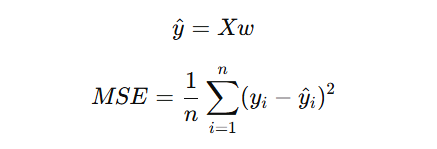

Градиент функции потерь:

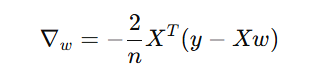

2.1 Функция потерь (MSE)

In [56]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

2.2 Batch Gradient Descent

In [57]:
def linear_regression_gd(X, y, lr=0.01, epochs=500):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)

    losses = []

    for _ in range(epochs):
        y_pred = X @ w
        error = y_pred - y

        grad = (2 / n_samples) * (X.T @ error)
        w -= lr * grad

        losses.append(mse(y, y_pred))

    return w, losses

2.3 Обучение модели

In [58]:
weights, losses = linear_regression_gd(
    X_reg, y_reg,
    lr=0.01,
    epochs=500
)

2.4 График функции потерь

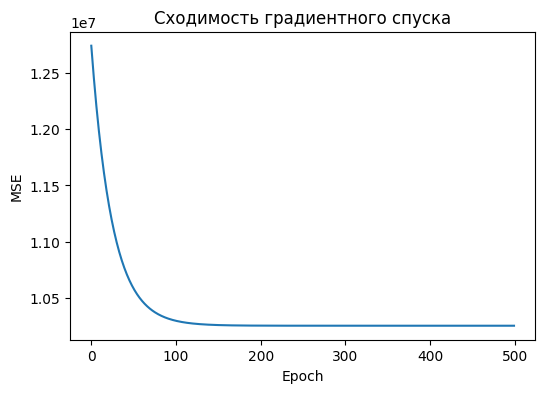

In [59]:
plt.figure(figsize=(6,4))
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Сходимость градиентного спуска')
plt.show()

2.5 Найденные коэффициенты

In [60]:
intercept = weights[0]
coefficients = weights[1:]

print("Intercept:", intercept)
print("Coefficients:", coefficients)

Intercept: 1528.475816820401
Coefficients: [360.1215417   73.29030677 -35.27963375  92.29472919]


2.6 Scatter plot + линия регрессии

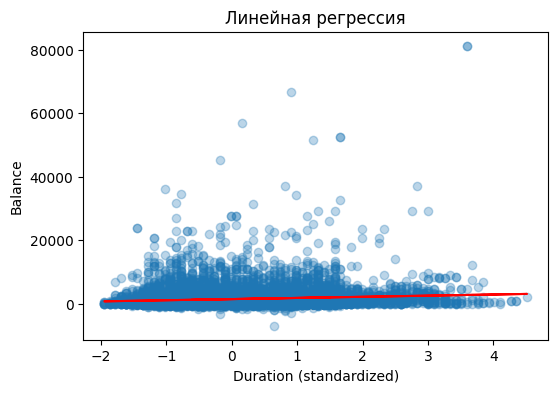

In [61]:
feature_index = 1  # duration

x_vals = X_reg[:, feature_index]
y_vals = y_reg

y_line = intercept + coefficients[feature_index-1] * x_vals

plt.figure(figsize=(6,4))
plt.scatter(x_vals, y_vals, alpha=0.3)
plt.plot(x_vals, y_line, color='red')
plt.xlabel('Duration (standardized)')
plt.ylabel('Balance')
plt.title('Линейная регрессия')
plt.show()

2.7 Эксперимент с learning rate

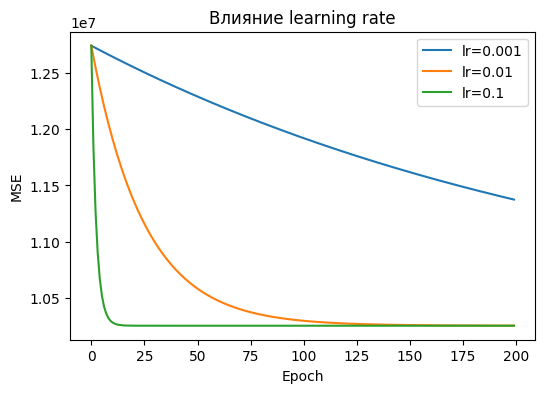

In [62]:
lrs = [0.001, 0.01, 0.1]

plt.figure(figsize=(6,4))

for lr in lrs:
    _, losses_lr = linear_regression_gd(X_reg, y_reg, lr=lr, epochs=200)
    plt.plot(losses_lr, label=f'lr={lr}')

plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Влияние learning rate')
plt.show()

Часть 3. Логистическая регрессия (реализация с нуля)

Сигмоида:

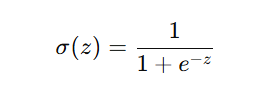

Модель:

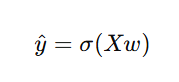

Функция потерь:

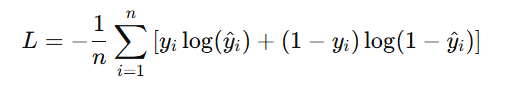

Градиент:

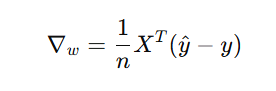

3.1 Сигмоида и Log Loss

In [63]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [64]:
def log_loss(y_true, y_pred):
    eps = 1e-9
    y_pred = np.clip(y_pred, eps, 1 - eps)
    return -np.mean(
        y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)
    )

3.2 Градиентный спуск (batch)

In [65]:
def logistic_regression_gd(X, y, lr=0.01, epochs=500):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)

    losses = []

    for _ in range(epochs):
        z = X @ w
        y_pred = sigmoid(z)

        grad = (1 / n_samples) * (X.T @ (y_pred - y))
        w -= lr * grad

        losses.append(log_loss(y, y_pred))

    return w, losses

3.3 Обучение модели

In [66]:
weights_log, losses_log = logistic_regression_gd(
    X_clf, y_clf,
    lr=0.01,
    epochs=500
)

3.4 График функции потерь

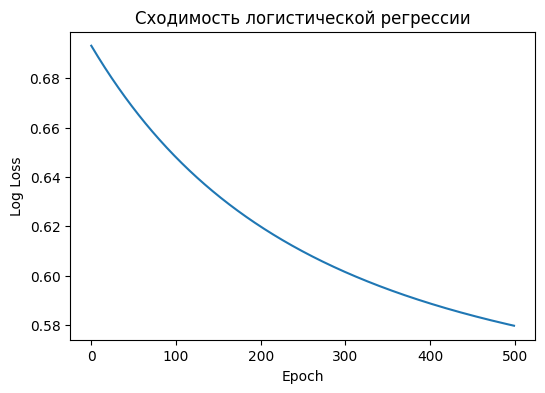

In [67]:
plt.figure(figsize=(6,4))
plt.plot(losses_log)
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.title('Сходимость логистической регрессии')
plt.show()

3.5 Предсказания классов и вероятностей

In [68]:
y_proba = sigmoid(X_clf @ weights_log)
y_pred = (y_proba >= 0.5).astype(int)

3.6 Метрики

In [69]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_auc_score
)

In [70]:
print("Accuracy:", accuracy_score(y_clf, y_pred))
print("Precision:", precision_score(y_clf, y_pred))
print("Recall:", recall_score(y_clf, y_pred))
print("F1-score:", f1_score(y_clf, y_pred))
print("ROC AUC:", roc_auc_score(y_clf, y_proba))

Accuracy: 0.7165382547930479
Precision: 0.7831068478550492
Recall: 0.5556816033276611
F1-score: 0.6500774165007742
ROC AUC: 0.8135217269991334


3.7 Confusion Matrix

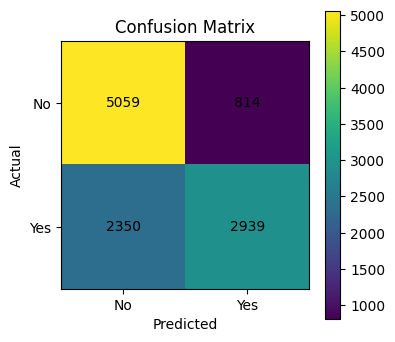

In [71]:
cm = confusion_matrix(y_clf, y_pred)

plt.figure(figsize=(4,4))
plt.imshow(cm)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0,1], ['No', 'Yes'])
plt.yticks([0,1], ['No', 'Yes'])

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

3.8 Эксперимент с learning rate

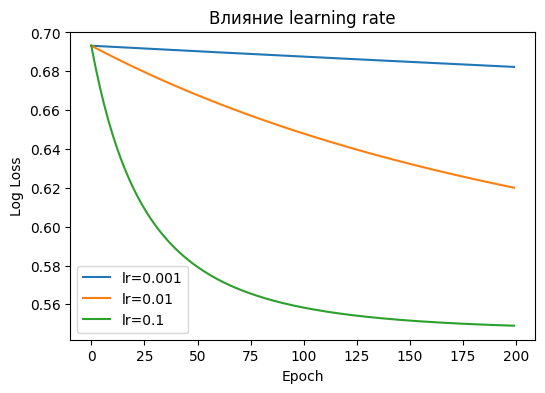

In [72]:
lrs = [0.001, 0.01, 0.1]

plt.figure(figsize=(6,4))

for lr in lrs:
    _, losses_lr = logistic_regression_gd(X_clf, y_clf, lr=lr, epochs=200)
    plt.plot(losses_lr, label=f'lr={lr}')

plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.title('Влияние learning rate')
plt.show()

Часть 4. Random Forest

4.1 Train / Test split

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_clf, y_clf,
    test_size=0.2,
    random_state=42,
    stratify=y_clf
)

4.2 Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=42
)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

4.3 Предсказания

In [75]:
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

4.4 Метрики Random Forest

In [76]:
print("Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_proba_rf))

Random Forest
Accuracy: 0.7572772055530677
Precision: 0.7263157894736842
Recall: 0.782608695652174
F1-score: 0.7534121929026387
ROC AUC: 0.8414760889675421


4.5 Сравнение с логистической регрессией

Логистическая регрессия (на test)

In [77]:
y_proba_log_test = sigmoid(X_test @ weights_log)
y_pred_log_test = (y_proba_log_test >= 0.5).astype(int)

print("Logistic Regression (from scratch)")
print("Accuracy:", accuracy_score(y_test, y_pred_log_test))
print("Precision:", precision_score(y_test, y_pred_log_test))
print("Recall:", recall_score(y_test, y_pred_log_test))
print("F1-score:", f1_score(y_test, y_pred_log_test))
print("ROC AUC:", roc_auc_score(y_test, y_proba_log_test))

Logistic Regression (from scratch)
Accuracy: 0.7147335423197492
Precision: 0.7695262483994878
Recall: 0.5680529300567108
F1-score: 0.6536160957041871
ROC AUC: 0.8125053292040381


4.6 Сравнительная таблица

In [78]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_log_test),
        accuracy_score(y_test, y_pred_rf)
    ],
    'F1-score': [
        f1_score(y_test, y_pred_log_test),
        f1_score(y_test, y_pred_rf)
    ],
    'ROC AUC': [
        roc_auc_score(y_test, y_proba_log_test),
        roc_auc_score(y_test, y_proba_rf)
    ]
})

results

,Model,Accuracy,F1-score,ROC AUC
0,Logistic Regression,0.714734,0.653616,0.812505
1,Random Forest,0.757277,0.753412,0.841476


Часть 5. Интерактивный интерфейс

In [79]:
import ipywidgets as widgets
from IPython.display import display, clear_output

In [80]:
X_train, X_test, y_train, y_test = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42, stratify=y_clf
)

5.1 Универсальная функция запуска модели

In [81]:
def run_model(model_type, lr, epochs):
    clear_output()

    if model_type == 'Linear Regression':
        weights, losses = linear_regression_gd(X_reg, y_reg, lr=lr, epochs=epochs)

        plt.figure(figsize=(6,4))
        plt.plot(losses)
        plt.xlabel('Epoch')
        plt.ylabel('MSE')
        plt.title('Linear Regression Loss')
        plt.show()

        print("Intercept:", weights[0])
        print("Coefficients:", weights[1:])

    elif model_type == 'Logistic Regression':
        weights, losses = logistic_regression_gd(X_clf, y_clf, lr=lr, epochs=epochs)

        plt.figure(figsize=(6,4))
        plt.plot(losses)
        plt.xlabel('Epoch')
        plt.ylabel('Log Loss')
        plt.title('Logistic Regression Loss')
        plt.show()

        y_proba = sigmoid(X_test @ weights)
        y_pred = (y_proba >= 0.5).astype(int)

        print("Logistic Regression (from scratch) metrics:")
        print("Accuracy:", accuracy_score(y_test, y_pred))
        print("Precision:", precision_score(y_test, y_pred))
        print("Recall:", recall_score(y_test, y_pred))
        print("F1-score:", f1_score(y_test, y_pred))
        print("ROC AUC:", roc_auc_score(y_test, y_proba))

        # Confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(4,4))
        plt.imshow(cm, cmap='Blues')
        plt.title('Confusion Matrix')
        plt.colorbar()
        plt.xticks([0,1], ['No', 'Yes'])
        plt.yticks([0,1], ['No', 'Yes'])
        for i in range(2):
            for j in range(2):
                plt.text(j, i, cm[i, j], ha='center', va='center', color='red')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

    elif model_type == 'Random Forest':
        rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
        rf.fit(X_train, y_train)
        y_pred_rf = rf.predict(X_test)
        y_proba_rf = rf.predict_proba(X_test)[:, 1]

        print("Random Forest metrics:")
        print("Accuracy:", accuracy_score(y_test, y_pred_rf))
        print("Precision:", precision_score(y_test, y_pred_rf))
        print("Recall:", recall_score(y_test, y_pred_rf))
        print("F1-score:", f1_score(y_test, y_pred_rf))
        print("ROC AUC:", roc_auc_score(y_test, y_proba_rf))

        # Confusion matrix
        cm = confusion_matrix(y_test, y_pred_rf)
        plt.figure(figsize=(4,4))
        plt.imshow(cm, cmap='Greens')
        plt.title('Confusion Matrix')
        plt.colorbar()
        plt.xticks([0,1], ['No', 'Yes'])
        plt.yticks([0,1], ['No', 'Yes'])
        for i in range(2):
            for j in range(2):
                plt.text(j, i, cm[i, j], ha='center', va='center', color='red')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

5.2 Виджеты управления

In [82]:
model_selector = widgets.Dropdown(
    options=['Linear Regression', 'Logistic Regression', 'Random Forest'],
    value='Linear Regression',
    description='Model:'
)

lr_slider = widgets.FloatLogSlider(
    value=0.01,
    base=10,
    min=-4,
    max=0,
    step=0.1,
    description='LR:'
)

epochs_slider = widgets.IntSlider(
    value=300,
    min=100,
    max=1000,
    step=100,
    description='Epochs:'
)

run_button = widgets.Button(description='Run Model')

In [83]:
def on_button_click(b):
    run_model(model_selector.value, lr_slider.value, epochs_slider.value)

run_button.on_click(on_button_click)

In [84]:
display(
    model_selector,
    lr_slider,
    epochs_slider,
    run_button
)

Dropdown(description='Model:', options=('Linear Regression', 'Logistic Regression', 'Random Forest'), value='L…

FloatLogSlider(value=0.01, description='LR:', max=0.0, min=-4.0)

IntSlider(value=300, description='Epochs:', max=1000, min=100, step=100)

Button(description='Run Model', style=ButtonStyle())